# [KNN roc](https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci/52910821)

预测值：
 [0.  0.1 1.  0.  1.  0.9 0.8 1.  0.  0.9 0.1 1.  0.9 1.  1.  0.  0.  1.
 0.  0.3 0.5 0.  1.  0.7 1.  0.  1.  0.8 0.  0.9 0.  1.  0.  1.  1.  1.
 1.  0.8 1.  1.  0.9 1.  0.  1.  1.  0.  0.  1.  0.9 0.1 0.2 0.9 0.  1.
 0.  1.  1.  0.7 0.9 0.  1.  1.  1.  0.  0.8 0.  1.  0.7 0.  1.  0.8 1.
 1.  1.  0.9 1.  1.  1.  1.  1.  1.  0.  1.  0.9 1.  0.  1.  0.  0.  0.1
 1.  1.  0.9 1.  0.6 1.  1.  0.2 1.  0.  0.9 1.  0.9 0.3 0.9 1.  0.  1.
 1.  1.  1.  0.5 1.  0.7]
type(y_scores): 
 <class 'numpy.ndarray'>
真实值：
 [0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0]
type(y_test): 
 <class 'numpy.ndarray'>
fpr:
 [0.         0.         0.02631579 0.05263158 0.07894737 0.10526316
 0.21052632 0.23684211 0.31578947 1.        ]
tpr:
 [0.         0.71052632 0.88157895 0.93421053 0.97368421 0.97368421
 0.97368421 0.98684211

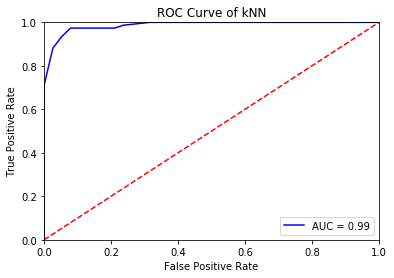

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_scores = knn.predict_proba(X_test)
print("预测值：\n", y_scores[:, 1])
print("type(y_scores): \n", type(y_scores))
print("真实值：\n", y_test)
print("type(y_test): \n", type(y_test))
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
print("fpr:\n", fpr)
print("tpr:\n", tpr)
print("threshold:\n", threshold)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [10]:
knn.predict_proba?

Signature: knn.predict_proba(X)
Docstring:
Return probability estimates for the test data X.

Parameters
----------
X : array-like, shape (n_queries, n_features),                 or (n_queries, n_indexed) if metric == 'precomputed'
    Test samples.

Returns
-------
p : array of shape = [n_queries, n_classes], or a list of n_outputs
    of such arrays if n_outputs > 1.
    The class probabilities of the input samples. Classes are ordered
    by lexicographic order.
File:      ~/miniconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py
Type:      method


# LOF for novelty detection

Automatically created module for IPython interactive environment


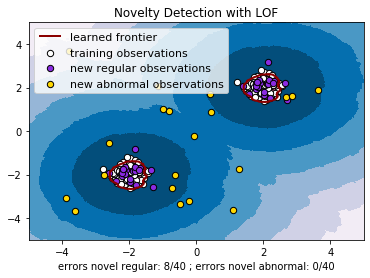

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate normal (not abnormal) training observations
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate new normal (not abnormal) observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)
# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the learned frontier, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers))
plt.show()